In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from maxvolpy.maxvol import rect_maxvol

In [2]:
import pandas as pd
# reading the dataset
calcofi = pd.read_csv("bottle.csv")
calcofi.tail()

/home/saeedosat/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,...,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
calcofi_subset = calcofi.loc[:,'Depthm':'O2Satq']
calcofi_subset.tail()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,7,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
864860,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
864862,15,17.533,33.3880,5.774,24.15297,105.66,252.08,1.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [4]:
calcofi_subset.isnull().sum()


Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
BtlNum         746196
RecInd              0
T_prec          10963
T_qual         841736
S_prec          47354
S_qual         789949
P_qual         191108
O_qual         680187
SThtaq         799040
O2Satq         647066
dtype: int64

In [5]:
calcofi_subset.fillna(method='ffill', inplace=True)

In [6]:
calcofi_subset.isnull().sum()


Depthm              0
T_degC              0
Salnty              0
O2ml_L           2160
STheta              0
O2Sat            2160
Oxy_µmol/Kg      2160
BtlNum         683767
RecInd              0
T_prec              0
T_qual            134
S_prec              0
S_qual             17
P_qual              0
O_qual              0
SThtaq             17
O2Satq              0
dtype: int64

In [7]:
calcofi_subset.dropna(inplace=True)

In [8]:
calcofi_subset.isnull().sum()


Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
BtlNum         0
RecInd         0
T_prec         0
T_qual         0
S_prec         0
S_qual         0
P_qual         0
O_qual         0
SThtaq         0
O2Satq         0
dtype: int64

In [9]:
calcofi = calcofi_subset[['Salnty', 'T_degC', 'Depthm', 'STheta', 'O2Sat', 'O2ml_L', 'O2ml_L']]

In [10]:
X = calcofi[['Salnty', 'Depthm', 'STheta', 'O2Sat', 'O2ml_L', 'O2ml_L']]
y = calcofi[['T_degC']]

In [11]:
X = X[:][:]
y = y[:][:]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)


In [ ]:
random_accuracies = []
rectmaxvol_accuracies = []
for n in np.arange(200, 2000, 300):
    index = np.random.choice(X_train.shape[0], n, replace=False)
    X_train_random = X_train[index]
    y_train_random = y_train[index]
    clf = LinearRegression()
    clf.fit(X_train_random, y_train_random)
    accuracy = clf.score(X_test, y_test)
    random_accuracies.append(accuracy)
    piv, C = rect_maxvol(X_train, minK=n, maxK=n)
    X_train_rectmaxvol = X_train[piv]
    y_train_rectmaxvol = y_train[piv]
    clf = LinearRegression()
    clf.fit(X_train_rectmaxvol, y_train_rectmaxvol)
    accuracy = clf.score(X_test, y_test)
    rectmaxvol_accuracies.append(accuracy)
    

In [13]:
random_accuracies = []
rectmaxvol_accuracies = []

In [21]:
n = 2000

In [22]:
index = np.random.choice(X_train.shape[0], n, replace=False)
X_train_random = X_train[index]
y_train_random = y_train[index]
clf = LinearRegression()
clf.fit(X_train_random, y_train_random)
accuracy = clf.score(X_test, y_test)
random_accuracies.append(accuracy)
piv, C = rect_maxvol(X_train, minK=n, maxK=n)
X_train_rectmaxvol = X_train[piv]
y_train_rectmaxvol = y_train[piv]
clf = LinearRegression()
clf.fit(X_train_rectmaxvol, y_train_rectmaxvol)
accuracy = clf.score(X_test, y_test)
rectmaxvol_accuracies.append(accuracy)

In [28]:
X_train_rectmaxvol
X_train.shape
rectmaxvol_accuracies

[0.4610869454330582, 0.6711807799063159, 0.8906315392083691]

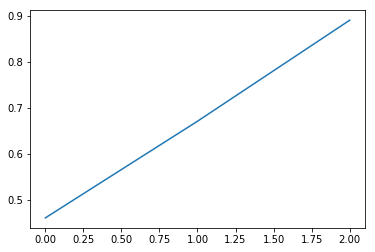

In [23]:
plt.plot(rectmaxvol_accuracies)

In [24]:
rectmaxvol_accuracies

[0.4610869454330582, 0.6711807799063159, 0.8906315392083691]

In [ ]:
clf = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [ ]:
accuracy